In [1]:
import open3d as o3d
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# def change(pos_array):
#     p = pos_array
#     p_new = np.zeros(p.shape)
#     for i in range(len(p)):
#         p_new[i] = np.array([p[i,0],-p[i,2],-p[i,1]]) 
#     return p_new

In [3]:
def change(pos_array):
    p = pos_array
    p_new = np.zeros(p.shape)
    for i in range(len(p)):
        p_new[i] = np.array([-p[i,0],-p[i,2],p[i,1]]) 
    return p_new

In [25]:
from pdb import set_trace as bp
def show():
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    ctr = vis.get_view_control()
    mesh = o3d.io.read_triangle_mesh('frame_000070.obj')
    mesh.paint_uniform_color([1, 0.706, 0])
    pcd = o3d.geometry.PointCloud()
    vertices = change(np.array(mesh.vertices))
    # print(np.array(mesh.vertices))
    pcd.points = o3d.utility.Vector3dVector(vertices)
    vis.add_geometry(pcd)
    # vis.add_geometry(mesh)

    param = o3d.io.read_pinhole_camera_parameters('sideview.json')
    # print(param.extrinsic)
    ctr.convert_from_pinhole_camera_parameters(param)
    vis.run()
    # param = ctr.convert_to_pinhole_camera_parameters()
    # o3d.io.write_pinhole_camera_parameters('sideview.json',param)
    vis.destroy_window()

show()

[Open3D WARNING] Unable to load file frame_000070.obj with ASSIMP


In [69]:
info['extrinsic_mat']

array([[ 7.9426438e-01, -6.0757226e-01, -5.1030739e-08, -5.6946307e-01],
       [-1.1685728e-01, -1.5276460e-01, -9.8132938e-01,  1.3398468e+00],
       [ 5.9622848e-01,  7.7943498e-01, -1.9233474e-01,  2.5805134e+01]],
      dtype=float32)

In [70]:
info['intrinsic_mat']

array([[4.5333335e+03, 0.0000000e+00, 9.5950000e+02],
       [0.0000000e+00, 4.5333335e+03, 5.3950000e+02],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [30]:
vertices.shape

(52512, 3)

In [4]:
def change1(pos_array):
    p = pos_array
    p_new = np.zeros(p.shape)
    for i in range(len(p)):
        p_new[i] = np.array([-p[i,0],p[i,1],p[i,2]]) 
    return p_new

In [5]:
trans = np.eye((3))
trans[0, 0] = 1
trans[1, 1]= 1
trans[2, 2] = 1

In [6]:
points_path = '/home/ivenwu/下载/PIFu_bitahub/ele1.npy'
points = np.load(points_path)

plt.figure(figsize=(18,12))
plt.plot(uv[:, 0], uv[:, 1], '.')
ax = plt.gca()                                 #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
ax.invert_yaxis()                            #反转Y坐标轴

plt.xlim((0, 1920))
plt.ylim((1080, 0)) 

NameError: name 'uv' is not defined

<Figure size 1296x864 with 0 Axes>

In [10]:
z

array([[25.94391365],
       [25.93257221],
       [25.97430754],
       ...,
       [26.62941515],
       [26.65711614],
       [26.57479624]])

[Open3D WARNING] Read PNG failed: unable to parse header.
[Open3D WARNING] Read PNG failed: unable to parse header.


(1024.0, 0.0)

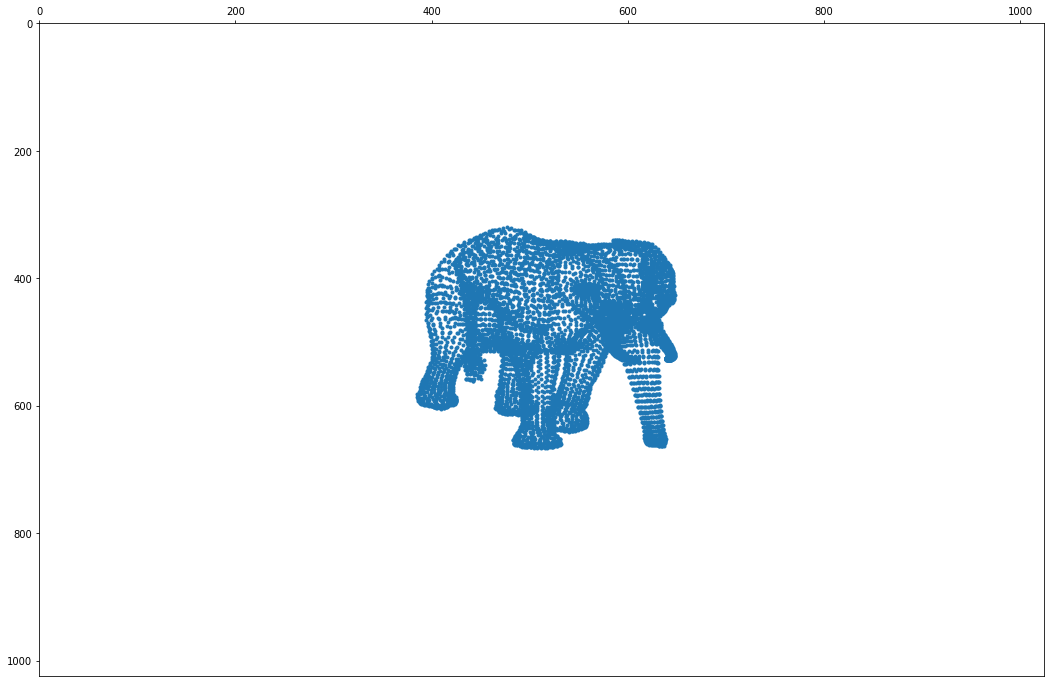

In [46]:
info = np.load('./video_obj_sample/african_elephant_female/info/0050.npz')
mesh = o3d.io.read_triangle_mesh('./video_obj_sample/african_elephant_female/frame_000050.obj')
vertices =change1(np.array(mesh.vertices))
# vertices = np.array(mesh.vertices)

ones = np.ones((len(vertices), 1))
vertices_h = np.concatenate((change(vertices), ones),1)
# extrin = np.concatenate((info['extrinsic_mat'],np.array([0,0,0,1]).reshape((1,4)) ))
# print(extrin)

intrin = info['intrinsic_mat']
intrin[0,:] = intrin[0,:]
intrin[1,:] = intrin[1,:]
xyz = intrin.dot(trans.dot(info['extrinsic_mat']).dot(vertices_h.transpose(1,0))).transpose(1,0)
z = xyz[:, [2]]
uv = xyz / z
plt.figure(figsize=(18,12))
plt.plot(uv[:, 0], uv[:, 1], '.')
ax = plt.gca()                                 #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
ax.invert_yaxis()                            #反转Y坐标轴

plt.xlim((0, 1024))
plt.ylim((1024, 0))

In [47]:
xyz[:,:-1].min()

7905.423295948917

In [48]:
xyz[:,:-1] = xyz[:,:-1]/xyz[:,[2]]

In [49]:
xyz[:,0] = (xyz[:,0]-512)/512
xyz[:,1] = (xyz[:,1]-512)/512

In [51]:
xyz[:,:-1].min()

-0.3749448668754719

In [52]:
xyz[:,-1] = xyz[:,-1]/xyz[:,-1].min()

In [56]:
xyz[:,-1] *=250/150

In [57]:
import open3d as o3d

vis = o3d.visualization.Visualizer()
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

o3d.visualization.draw_geometries([pcd])

In [120]:
uv.max()

1274.0412716891437

In [148]:
vertices.min()

-2.947495937347412

In [43]:
mesh = o3d.io.read_triangle_mesh('0023.obj')

[Open3D WARNING] Unable to load file 0023.obj with ASSIMP


In [19]:
extr = info['extrinsic_mat']
intr = info['intrinsic_mat']

In [116]:
depth = info['depth_map']
depth.astype(np.uint8)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 19,  19,  19, ...,  19,  19,  19],
       [ 19,  19,  19, ...,  19,  19,  19],
       [ 19,  19,  19, ...,  19,  19,  19]], dtype=uint8)

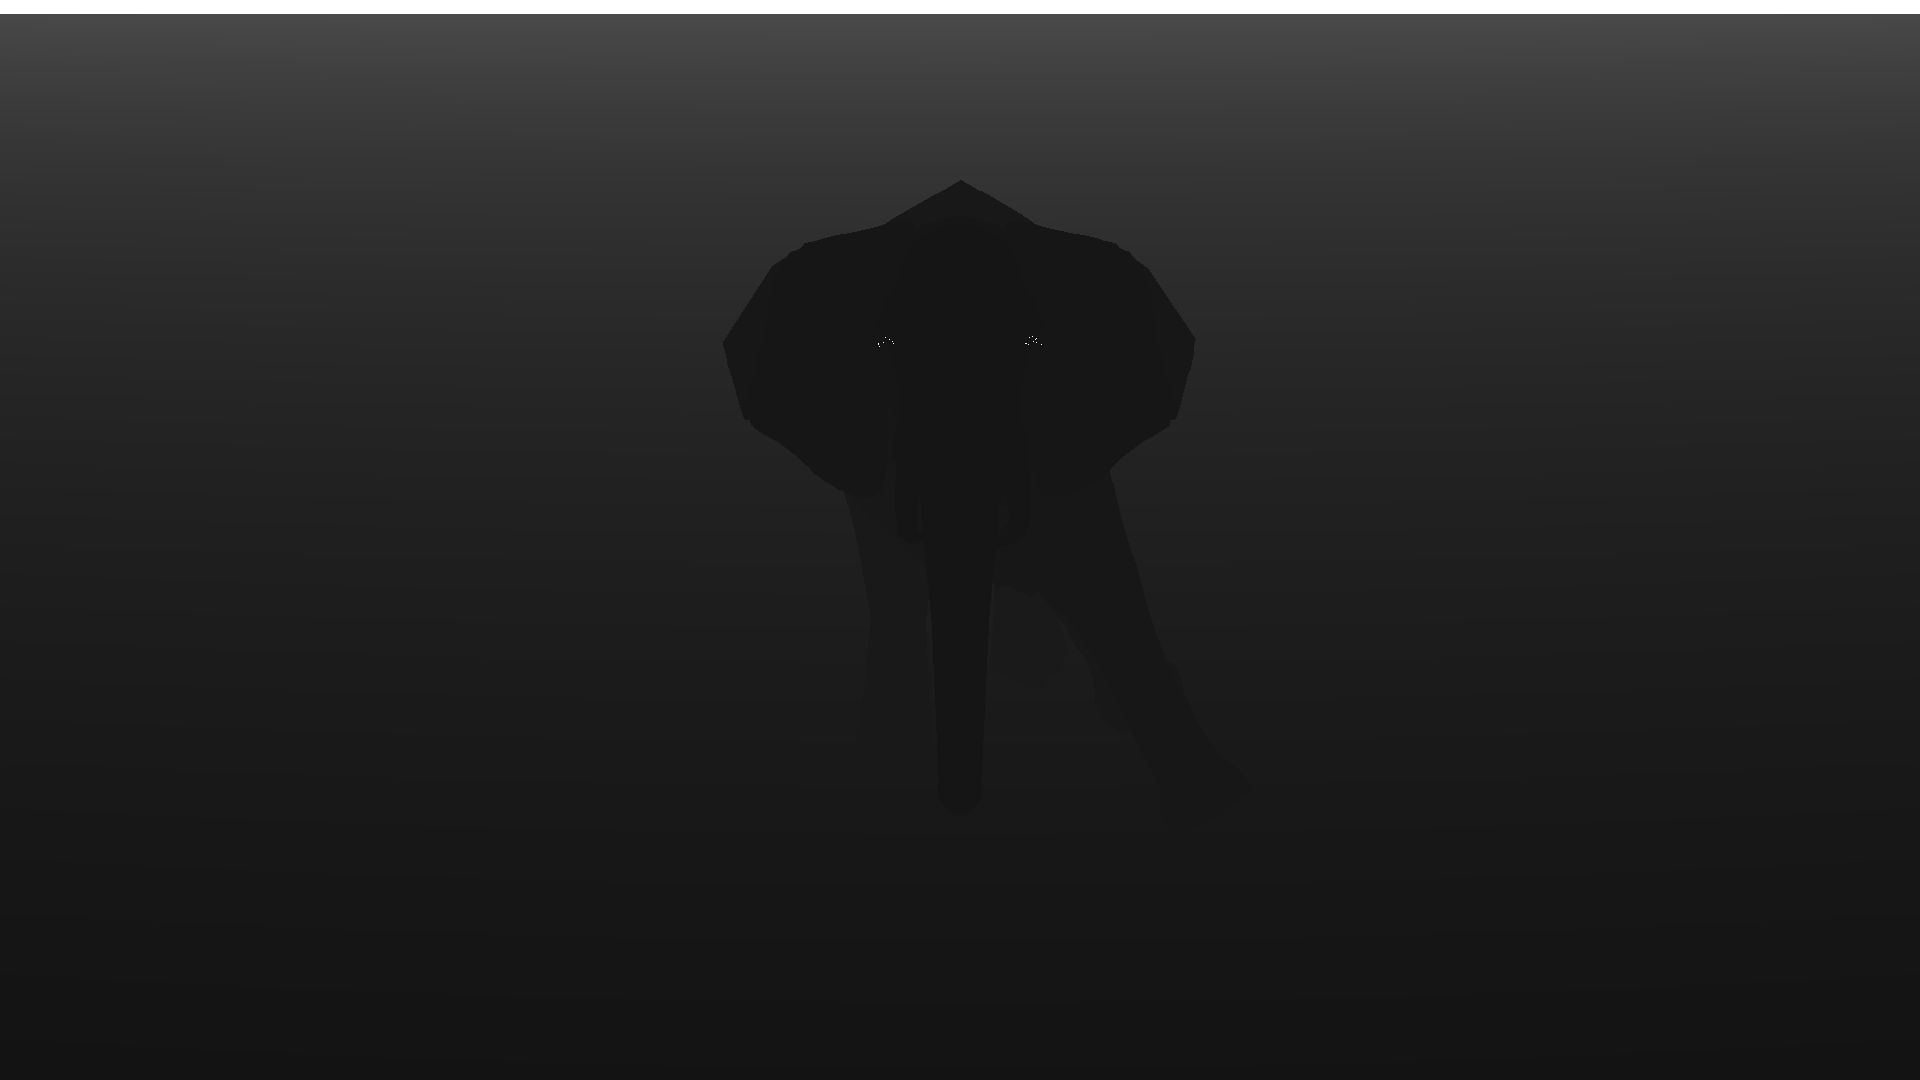

In [117]:
from PIL import Image
Image.fromarray(depth.astype(np.uint8))

In [36]:
trans.dot(extr)

array([[ 2.47939348e-01, -9.68775511e-01,  4.59715039e-08,
        -3.91302466e-01],
       [ 1.81776121e-01,  4.65221554e-02,  9.82238829e-01,
        -1.45676947e+00],
       [-9.51568961e-01, -2.43535608e-01,  1.87634960e-01,
        -2.58329239e+01]])

In [34]:
extr

array([[ 2.4793935e-01, -9.6877551e-01,  4.5971504e-08, -3.9130247e-01],
       [-1.8177612e-01, -4.6522155e-02, -9.8223883e-01,  1.4567695e+00],
       [ 9.5156896e-01,  2.4353561e-01, -1.8763496e-01,  2.5832924e+01]],
      dtype=float32)

In [52]:
info['intrinsic_mat'].dot(info['extrinsic_mat'].dot(vertices_h.transpose(1,0))).shape

(3, 52512)

In [34]:
extrin = np.concatenate(info['extrinsic_mat'],np.array([0,0,0,1]).reshape((1,4)),0)
print(extrin)

TypeError: only integer scalar arrays can be converted to a scalar index

In [39]:
np.concatenate((info['extrinsic_mat'],np.array([0,0,0,1]).reshape((1,4)) ) )

array([[ 2.47939348e-01, -9.68775511e-01,  4.59715039e-08,
        -3.91302466e-01],
       [-1.81776121e-01, -4.65221554e-02, -9.82238829e-01,
         1.45676947e+00],
       [ 9.51568961e-01,  2.43535608e-01, -1.87634960e-01,
         2.58329239e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [36]:
np.array([0,0,0,1]).reshape((1,4))

array([[0, 0, 0, 1]])

In [45]:
info['intrinsic_mat'].dot(info['extrinsic_mat']) 

array([[ 2.0370221e+03, -4.1581104e+03, -1.8003554e+02,  2.3012787e+04],
       [-3.1068030e+02, -7.9512985e+01, -4.5540454e+03,  2.0540885e+04],
       [ 9.5156896e-01,  2.4353561e-01, -1.8763496e-01,  2.5832924e+01]],
      dtype=float32)